# **BUS5PR1 Assignment 2**

---



## **The Hustle –UN’s Sustainable Development Goal Twitter Discussion Analysis**


---


**Student ID:- 21883191**

**Student Name:- Ishan Khanijo**

---


*Sprint1 individual task:*

*Data set: Zero Hunger*


# Importing the libraries

In [1]:
import pandas as pd

# Loading the dataset

In [2]:
# Storing the excel file and the sheet name in these 2 variables.
file_name = 'Twitter_Dataset.xlsx'
sheet_name = '2_Zero_Hunger'

# Read the specific sheet into a DataFrame, by accessing the 2 variables
df = pd.read_excel(file_name, sheet_name=sheet_name)

# Display the DataFrame
df.head()  # This will display the first five rows of the sheet


,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-05-05 01:12:20+00:00,2018-05-05,2018,992572672692240000,Star Wars,20106852,Thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,False,0.0
1,2018-05-07 15:43:19+00:00,2018-05-07,2018,993516638317235968,UNICEF USA,7383122,"#BTSARMY, all we have to say is WOW! Thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,False,0.0
2,2018-07-13 05:39:03+00:00,2018-07-13,2018,1017644553166150016,Demi Lovato,21111883,Lets #BeTheGeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,False,0.0
3,2019-10-01 19:48:30+00:00,2019-10-01,2019,1179120926010599936,Bill Gates,50393960,Most people know @AlikoDangote as Africa’s wea...,NaN,en,6302,21702,630,541,False,0.0
4,2019-10-08 21:41:59+00:00,2019-10-08,2019,1181686200068800000,Bill Gates,50393960,Malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,False,0.0


# Column Removal

These columns are not relevant for an NLP project.

In [3]:
# Columns to drop
columns_to_drop = ['Timestamp','Year','Tweet_ID', 'Username', 'User_ID', 'Is_Quote_Status', 'Possibly_Sensitive']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
df.head()


,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count
0,2018-05-05,Thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576
1,2018-05-07,"#BTSARMY, all we have to say is WOW! Thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406
2,2018-07-13,Lets #BeTheGeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104
3,2019-10-01,Most people know @AlikoDangote as Africa’s wea...,NaN,en,6302,21702,630,541
4,2019-10-08,Malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Day             3290 non-null   datetime64[ns]
 1   Text            3290 non-null   object        
 2   Hashtags        1461 non-null   object        
 3   Language        3290 non-null   object        
 4   Retweet_Count   3290 non-null   int64         
 5   Favorite_Count  3290 non-null   int64         
 6   Reply_Count     3290 non-null   int64         
 7   Quote_Count     3290 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 205.8+ KB


# **Preliminiry Analysis**

# Word Count
Added a new column that contains the total number of words in the "Text" column for each row.

This is **without** including spaces.

In [5]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df.head(5)

,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count
0,2018-05-05,Thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41
1,2018-05-07,"#BTSARMY, all we have to say is WOW! Thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,38
2,2018-07-13,Lets #BeTheGeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,44
3,2019-10-01,Most people know @AlikoDangote as Africa’s wea...,NaN,en,6302,21702,630,541,40
4,2019-10-08,Malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,33


Here is the code which calculates the number of characters in **with** spaces.

In [6]:
df['char_count'] = df['Text'].str.len()  # Includes the spaces
df.head(5)

,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count
0,2018-05-05,Thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301
1,2018-05-07,"#BTSARMY, all we have to say is WOW! Thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,38,251
2,2018-07-13,Lets #BeTheGeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,44,300
3,2019-10-01,Most people know @AlikoDangote as Africa’s wea...,NaN,en,6302,21702,630,541,40,246
4,2019-10-08,Malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,33,229


Now we have calculate the average word length for each tweet.

In [7]:
def avg_word(text):
  words = text.split() # split the text into words
  avg_of_words = (sum(len(word) for word in words)/len(words))
  return avg_of_words

df['avg_word'] = df['Text'].apply(avg_word)
df.head(5)

,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count,avg_word
0,2018-05-05,Thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301,6.365854
1,2018-05-07,"#BTSARMY, all we have to say is WOW! Thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,38,251,5.578947
2,2018-07-13,Lets #BeTheGeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,44,300,5.840909
3,2019-10-01,Most people know @AlikoDangote as Africa’s wea...,NaN,en,6302,21702,630,541,40,246,5.175000
4,2019-10-08,Malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,33,229,5.969697


# **Text Pre-processing**

Converting the the tweets to lower case.
Add some content regarding this.

In [8]:
df['Text'] = df['Text'].str.lower()
df.head()

,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count,avg_word
0,2018-05-05,thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301,6.365854
1,2018-05-07,"#btsarmy, all we have to say is wow! thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,38,251,5.578947
2,2018-07-13,lets #bethegeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,44,300,5.840909
3,2019-10-01,most people know @alikodangote as africa’s wea...,NaN,en,6302,21702,630,541,40,246,5.175000
4,2019-10-08,malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,33,229,5.969697


# Regular expressions

This code only keeps the words and characters.

In [9]:
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df.head()

,Day,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count,avg_word
0,2018-05-05,thanks to fans from around the world &amp; the...,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301,6.365854
1,2018-05-07,"#btsarmy, all we have to say is wow! thanks to...","BTSARMY,RoarForChange",en,23305,37426,544,406,38,251,5.578947
2,2018-07-13,lets #bethegeneration to end extreme poverty. ...,BeTheGeneration,en,2890,17110,374,104,44,300,5.840909
3,2019-10-01,most people know @alikodangote as africa’s wea...,NaN,en,6302,21702,630,541,40,246,5.175000
4,2019-10-08,malnutrition is the greatest health inequity i...,NaN,en,1604,7536,424,148,33,229,5.969697


We are not removing digits here because, important statistical data might get lost.

**importing the libraries required for stopword removal**

In [10]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Removing punctuation marks, hashtags, and mentions.

Although hashtags are important in our case, we have a separate column for it. So we do not need it in the main tweet's text body.

In [11]:
# Load the standard stop words
stop_words = set(stopwords.words('english'))

# Define a list of negation words that we want to keep
negation_words = ["not", "no", "never", "n't", "cannot", "can't", "won't", "didn't", "doesn't", "isn't", "wasn't", "couldn't"]

# Remove negation words from the stop words set
stop_words = stop_words - set(negation_words)

# Pre-processing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)  # Remove mentions, hashtags, and digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Remove stop words (excluding negation words)
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the pre-processing function to the 'Text' column
df['cleaned_text'] = df['Text'].apply(preprocess_text)

# Display the cleaned DataFrame
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,thanks to fans from around the world &amp; the...,thanks fans around world amp reached maximum d...
1,"#btsarmy, all we have to say is wow! thanks to...",say wow thanks activism reached donation goal ...
2,lets #bethegeneration to end extreme poverty. ...,lets end extreme poverty dec join call world l...
3,most people know @alikodangote as africa’s wea...,people know africas wealthiest man know one fo...
4,malnutrition is the greatest health inequity i...,malnutrition greatest health inequity world re...


# Common word removal

After this, we remove some additional common words, which is not required for our case.

here we remove some additional common words, that might be present in these tweets, that are not required for analysis.

In [12]:

additional_stop_words = [
    'about', 'further', 'however',
    'really','such', 'though', 'upon'
]

# Remove additional common words from the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].apply(lambda text: ' '.join([word for word in text.split() if word not in additional_stop_words]))

# Display the first few rows after additional common word removal
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,thanks to fans from around the world &amp; the...,thanks fans around world amp reached maximum d...
1,"#btsarmy, all we have to say is wow! thanks to...",say wow thanks activism reached donation goal ...
2,lets #bethegeneration to end extreme poverty. ...,lets end extreme poverty dec join call world l...
3,most people know @alikodangote as africa’s wea...,people know africas wealthiest man know one fo...
4,malnutrition is the greatest health inequity i...,malnutrition greatest health inequity world re...


removing the original text column because we have our cleaned_text column now.

In [13]:
# Remove the original 'Text' column
df = df.drop(columns=['Text'])

# Display the updated DataFrame
df.head()

,Day,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count,avg_word,cleaned_text
0,2018-05-05,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301,6.365854,thanks fans around world amp reached maximum d...
1,2018-05-07,"BTSARMY,RoarForChange",en,23305,37426,544,406,38,251,5.578947,say wow thanks activism reached donation goal ...
2,2018-07-13,BeTheGeneration,en,2890,17110,374,104,44,300,5.840909,lets end extreme poverty dec join call world l...
3,2019-10-01,NaN,en,6302,21702,630,541,40,246,5.175000,people know africas wealthiest man know one fo...
4,2019-10-08,NaN,en,1604,7536,424,148,33,229,5.969697,malnutrition greatest health inequity world re...


#  Word frequency

We first get the most common words in all the tweets, by combinning all of them in a single string. Then we visualize it to identify top 15 common words.

In [14]:
from collections import Counter

# Generate word frequencies from the 'cleaned_text' column
all_words = ' '.join(df['cleaned_text'])

# Split the words and count their frequencies
word_freq = Counter(all_words.split())

# Convert word frequency to a DataFrame for easy visualization
word_freq_df = pd.DataFrame(word_freq.most_common(15), columns=['Word', 'Frequency'])

# Display the most common words and their frequencies
print(word_freq_df)

            Word  Frequency
0           food       2586
1       security       1802
2   malnutrition       1053
3    agriculture        647
4            amp        626
5    sustainable        492
6        farmers        430
7       children        355
8         health        302
9         hunger        291
10        people        282
11       climate        282
12           not        273
13       support        264
14  agricultural        261


We can see the word **not** here, so we need to remove it from here, we cannot hae it in our text blob, it has no context here. So we simply replace it with the word that has the 16th highest frequency.

            Word  Frequency
0           food       2586
1       security       1802
2   malnutrition       1053
3    agriculture        647
4            amp        626
5    sustainable        492
6        farmers        430
7       children        355
8         health        302
9         hunger        291
10        people        282
11       climate        282
12       support        264
13  agricultural        261
14        global        258


<ipython-input-15-992a46cf5340>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='plasma')


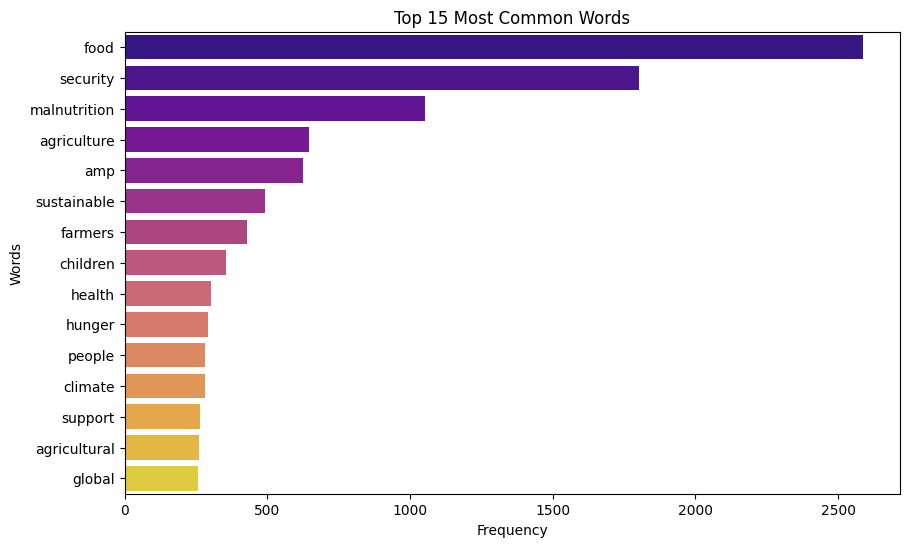

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove "not" from the word frequency list
word_freq_cleaned = [item for item in word_freq.most_common() if item[0] != 'not']

# Get the top 15 words, replacing "not" with the 16th highest word
word_freq_df = pd.DataFrame(word_freq_cleaned[:15], columns=['Word', 'Frequency'])

# Display the updated word frequency table
print(word_freq_df)

# Plot the updated top 15 most common words using a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='plasma')
plt.title('Top 15 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Using this code to identify what words will be used in the word cloud. By doing this we can remove irrelevant words beforehand.

In [16]:
# Generate word frequencies from the cleaned text
all_words = ' '.join(df['cleaned_text'])

# Split the words and count their frequencies
word_freq = Counter(all_words.split())

# Display the top 50 most common words
word_freq.most_common(50)


[('food', 2586),
 ('security', 1802),
 ('malnutrition', 1053),
 ('agriculture', 647),
 ('amp', 626),
 ('sustainable', 492),
 ('farmers', 430),
 ('children', 355),
 ('health', 302),
 ('hunger', 291),
 ('people', 282),
 ('climate', 282),
 ('not', 273),
 ('support', 264),
 ('agricultural', 261),
 ('global', 258),
 ('state', 207),
 ('help', 201),
 ('gaza', 197),
 ('need', 194),
 ('nutrition', 189),
 ('us', 187),
 ('farming', 186),
 ('today', 183),
 ('change', 182),
 ('child', 180),
 ('also', 179),
 ('future', 173),
 ('world', 172),
 ('production', 169),
 ('government', 168),
 ('due', 163),
 ('like', 158),
 ('one', 156),
 ('development', 156),
 ('water', 150),
 ('across', 146),
 ('new', 146),
 ('national', 144),
 ('inequality', 144),
 ('local', 144),
 ('million', 138),
 ('years', 130),
 ('relief', 127),
 ('key', 126),
 ('project', 122),
 ('president', 121),
 ('challenges', 118),
 ('severe', 114),
 ('no', 113)]

Removing irrelevant words, which woudln't make sense in a word cloud. I have also removed "amp" becasue that's how HTML encodes the "&" symbol as. This is not needed in our NLP analysis.

In [17]:
# Remove the word "amp" from the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\bamp\b', '', regex=True)

# Display the first few rows to verify
df[['cleaned_text']].head()


,cleaned_text
0,thanks fans around world reached maximum dona...
1,say wow thanks activism reached donation goal ...
2,lets end extreme poverty dec join call world l...
3,people know africas wealthiest man know one fo...
4,malnutrition greatest health inequity world re...


            Word  Frequency
0           food       2586
1       security       1802
2   malnutrition       1053
3    agriculture        647
4    sustainable        492
5        farmers        430
6       children        355
7         health        302
8         hunger        291
9         people        282
10       climate        282
11       support        264
12  agricultural        261
13        global        258
14         state        207


<ipython-input-19-a490473e520a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df_filtered, palette='plasma')


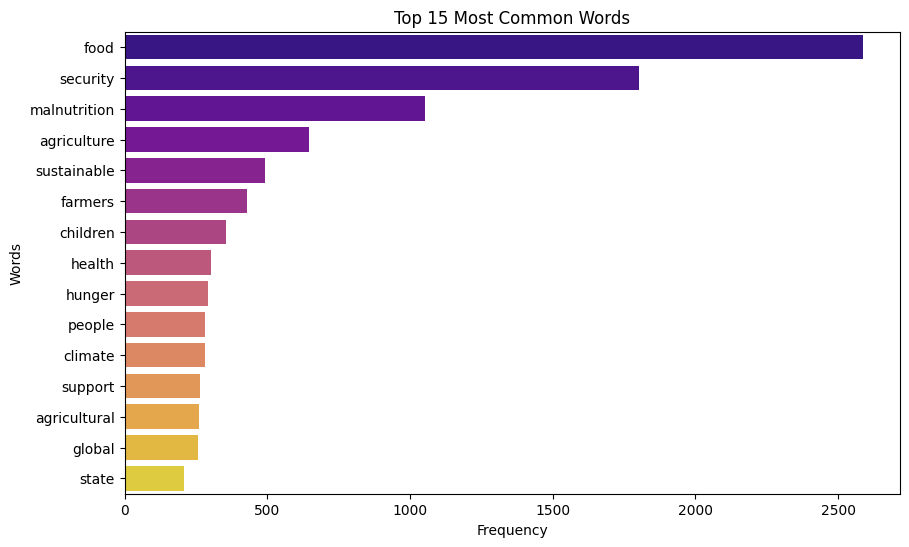

In [19]:
# Define irrelevant words based on context and analysis
irrelevant_words = ['not', 'due', 'like', 'one', 'also', 'no', 'years', 'new','amp']

# Filter word frequencies for display (excluding irrelevant words)
word_freq_filtered = [(word, freq) for word, freq in word_freq.most_common() if word not in irrelevant_words]

# Convert the filtered word frequencies to a DataFrame for visualization
word_freq_df_filtered = pd.DataFrame(word_freq_filtered[:15], columns=['Word', 'Frequency'])

# Display the updated word frequency table (excluding irrelevant words)
print(word_freq_df_filtered)

# Plot the updated top 15 most common words using a bar chart (excluding irrelevant words)
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df_filtered, palette='plasma')
plt.title('Top 15 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


# Word Cloud

Importing the necessary libraries.

In [20]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt


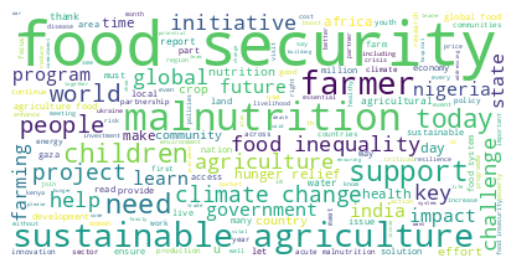

In [21]:
# Join the cleaned text into a single string, excluding irrelevant words
corpus = ' '.join([word for word in df['cleaned_text'].str.split().sum() if word not in irrelevant_words])

# Generate the word cloud using the same styling
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      max_font_size=100,
                      random_state=42).generate(corpus)

# Plot the word cloud
fig = plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()

# N-grams Analysis

First we will perform lemmitization.

In [22]:
# Import the WordNetLemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
import nltk

# Download WordNet data if not already present
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatize_function(sent, pos='n'):
    word_list = sent.split()
    lemma_word_list = [lemmatizer.lemmatize(word, pos=pos) for word in word_list]
    lemma_sentence = " ".join(lemma_word_list)
    return lemma_sentence

# Apply lemmatization to the 'cleaned_text' column
df['text_lemmatized'] = df['cleaned_text'].apply(lemmatize_function)

# Display the first few rows to verify
df[['cleaned_text', 'text_lemmatized']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,cleaned_text,text_lemmatized
0,thanks fans around world reached maximum dona...,thanks fan around world reached maximum donati...
1,say wow thanks activism reached donation goal ...,say wow thanks activism reached donation goal ...
2,lets end extreme poverty dec join call world l...,let end extreme poverty dec join call world le...
3,people know africas wealthiest man know one fo...,people know africa wealthiest man know one fou...
4,malnutrition greatest health inequity world re...,malnutrition greatest health inequity world re...


In [23]:
# Drop the 'cleaned_text' column from the DataFrame
df = df.drop(columns=['cleaned_text'])

# Display the first few rows to verify the change
df.head()

,Day,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,word_count,char_count,avg_word,text_lemmatized
0,2018-05-05,"BTSARMY,StarWarsDay",en,29086,42703,1082,1576,41,301,6.365854,thanks fan around world reached maximum donati...
1,2018-05-07,"BTSARMY,RoarForChange",en,23305,37426,544,406,38,251,5.578947,say wow thanks activism reached donation goal ...
2,2018-07-13,BeTheGeneration,en,2890,17110,374,104,44,300,5.840909,let end extreme poverty dec join call world le...
3,2019-10-01,NaN,en,6302,21702,630,541,40,246,5.175000,people know africa wealthiest man know one fou...
4,2019-10-08,NaN,en,1604,7536,424,148,33,229,5.969697,malnutrition greatest health inequity world re...


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert cleaned_text column to a list for processing
corpus = df['text_lemmatized'].tolist()

# Define a function for generating N-grams
def generate_ngrams(corpus, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    ngrams = vectorizer.get_feature_names_out()
    ngrams_freq = X.toarray().sum(axis=0)
    ngrams_freq_dict = dict(zip(ngrams, ngrams_freq))

    # Sort the n-grams by frequency
    sorted_ngrams = sorted(ngrams_freq_dict.items(), key=lambda item: item[1], reverse=True)
    return sorted_ngrams[:15]  # Return top 15 n-grams

# Generate and display unigrams, bigrams, and trigrams
print("Top 15 Unigrams:")
print(generate_ngrams(corpus, 1))

print("\nTop 15 Bigrams:")
print(generate_ngrams(corpus, 2))

print("\nTop 15 Trigrams:")
print(generate_ngrams(corpus, 3))


Top 15 Unigrams:
[('food', 2612), ('security', 1802), ('malnutrition', 1054), ('agriculture', 649), ('child', 539), ('sustainable', 492), ('farmer', 463), ('health', 302), ('support', 296), ('hunger', 291), ('people', 291), ('climate', 283), ('need', 277), ('not', 273), ('agricultural', 261)]

Top 15 Bigrams:
[('food security', 1698), ('sustainable agriculture', 321), ('climate change', 144), ('food inequality', 130), ('hunger relief', 111), ('agriculture food', 91), ('global food', 90), ('food system', 82), ('due malnutrition', 69), ('acute malnutrition', 67), ('food insecurity', 53), ('ensure food', 43), ('million people', 43), ('ensuring food', 42), ('food production', 42)]

Top 15 Trigrams:
[('agriculture food security', 80), ('global food security', 69), ('ensure food security', 41), ('food security nutrition', 37), ('ensuring food security', 36), ('boost food security', 34), ('improve food security', 31), ('enhance food security', 30), ('due malnutrition lack', 26), ('tackle food

<ipython-input-25-5fdd565504c9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngrams_df, palette='plasma')


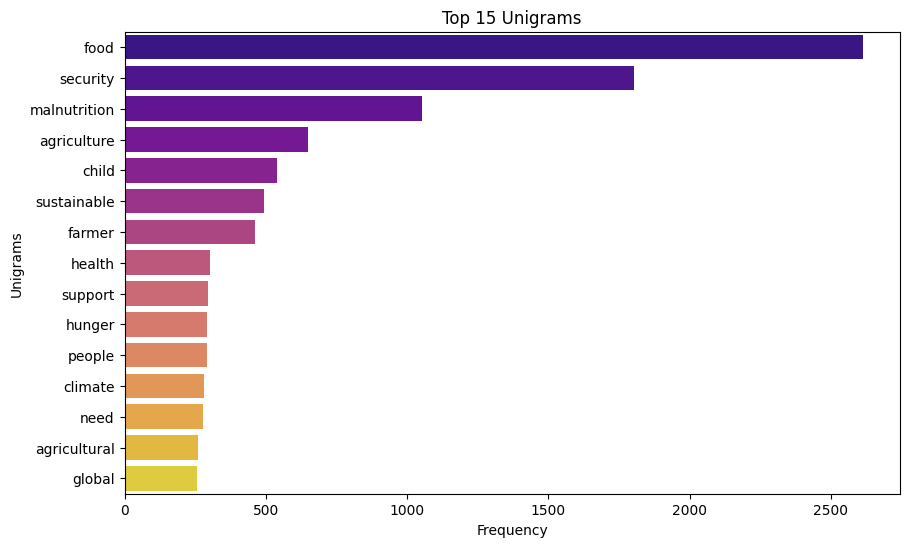

<ipython-input-25-5fdd565504c9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngrams_df, palette='plasma')


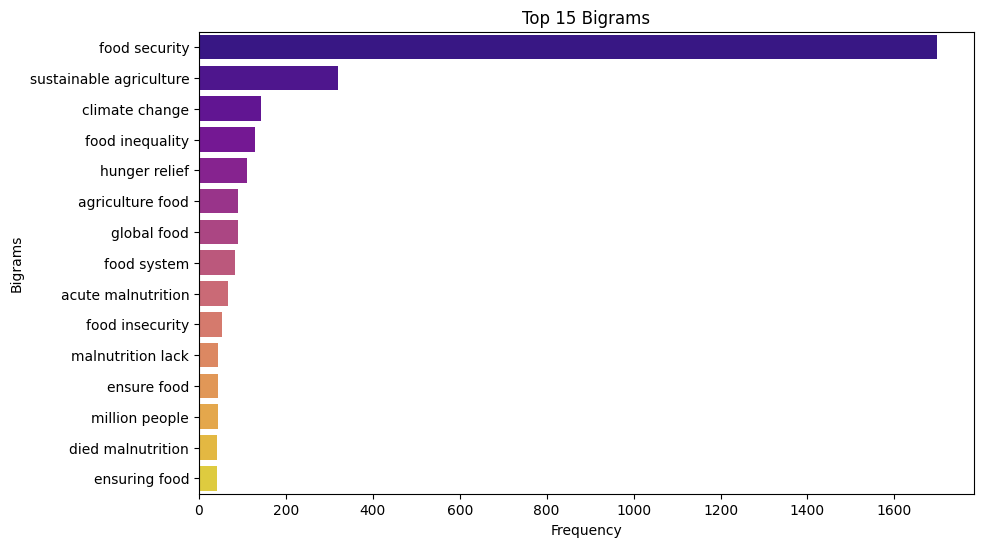

<ipython-input-25-5fdd565504c9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngrams_df, palette='plasma')


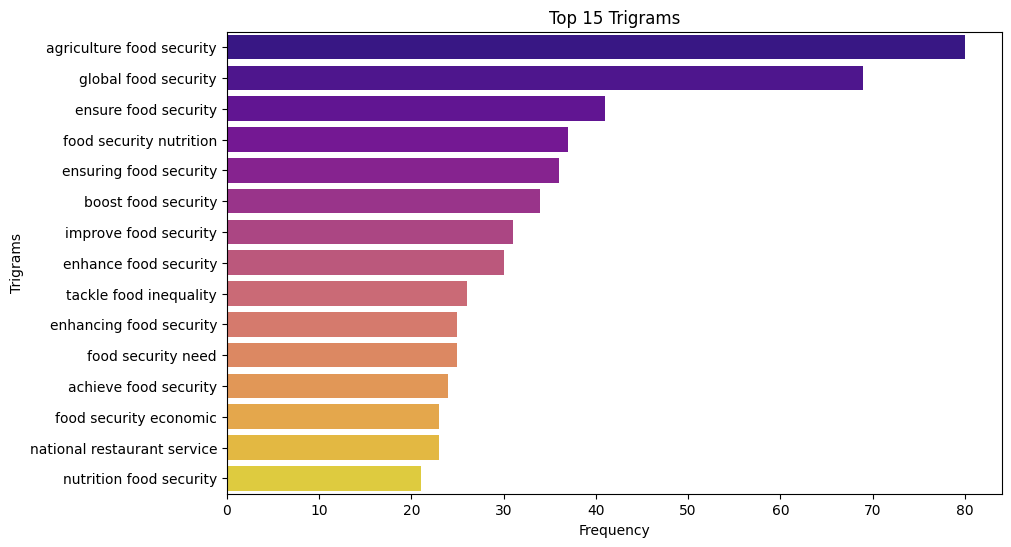

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Define irrelevant words to exclude from the N-grams analysis
irrelevant_words = ['not', 'due', 'like', 'one', 'also', 'no', 'years', 'new','us','th','amp']

# Function to exclude irrelevant words from N-grams
def exclude_irrelevant_words(corpus, irrelevant_words):
    filtered_corpus = []
    for text in corpus:
        filtered_text = ' '.join([word for word in text.split() if word not in irrelevant_words])
        filtered_corpus.append(filtered_text)
    return filtered_corpus

# Clean the corpus by excluding irrelevant words
filtered_corpus = exclude_irrelevant_words(df['text_lemmatized'].tolist(), irrelevant_words)

# Function for generating and visualizing N-grams
def visualize_ngrams(corpus, n, title):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    ngrams = vectorizer.get_feature_names_out()
    ngrams_freq = X.toarray().sum(axis=0)
    ngrams_freq_dict = dict(zip(ngrams, ngrams_freq))

    # Sort and select top 15 N-grams
    sorted_ngrams = sorted(ngrams_freq_dict.items(), key=lambda item: item[1], reverse=True)[:15]

    # Create DataFrame for easy visualization
    ngrams_df = pd.DataFrame(sorted_ngrams, columns=['N-gram', 'Frequency'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='N-gram', data=ngrams_df, palette='plasma')
    plt.title(f'Top 15 {title}')
    plt.xlabel('Frequency')
    plt.ylabel(f'{title}')
    plt.show()

# Visualize Unigrams, Bigrams, and Trigrams with irrelevant words excluded
visualize_ngrams(filtered_corpus, 1, 'Unigrams')
visualize_ngrams(filtered_corpus, 2, 'Bigrams')
visualize_ngrams(filtered_corpus, 3, 'Trigrams')


# Tweet Count Stats

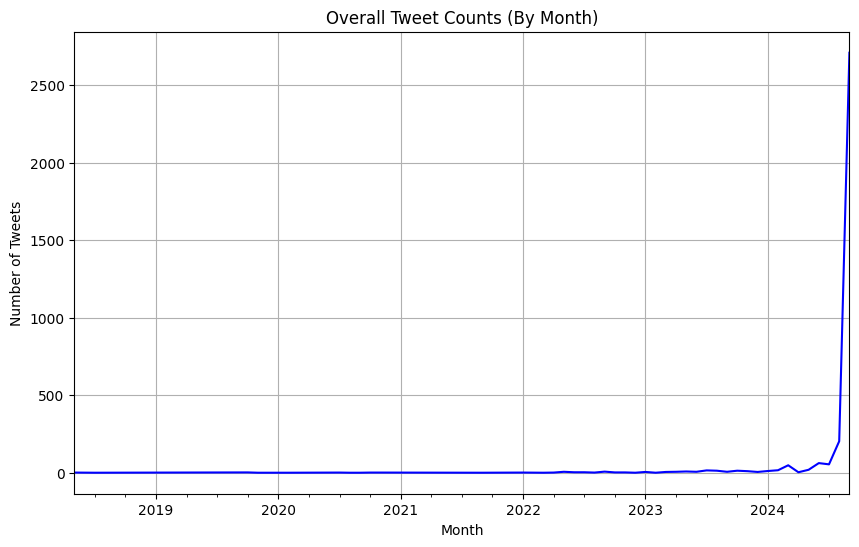

In [26]:
# Ensure 'Day' is in datetime format
df['Day'] = pd.to_datetime(df['Day'])

# Extract month and day number from the 'Day' column
df['Month'] = df['Day'].dt.month
df['Day_Number'] = df['Day'].dt.day

# Group by month and count the number of tweets for all available data
tweet_counts_overall = df.groupby(df['Day'].dt.to_period('M')).size()

# Plot tweet counts over time for all available data
plt.figure(figsize=(10, 6))
tweet_counts_overall.plot(kind='line', color='blue')
plt.title('Overall Tweet Counts (By Month)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [27]:
# Ensure 'Day' is in datetime format
df['Day'] = pd.to_datetime(df['Day'])

# Extract year from the 'Day' column
df['Year'] = df['Day'].dt.year

# Group by year and count the number of tweets
tweet_counts_per_year = df.groupby('Year').size().reset_index(name='Tweet_Count')

# Display the tweet counts per year in tabular form
print(tweet_counts_per_year)


   Year  Tweet_Count
0  2018            3
1  2019            4
2  2020            9
3  2021            1
4  2022           37
5  2023          104
6  2024         3132


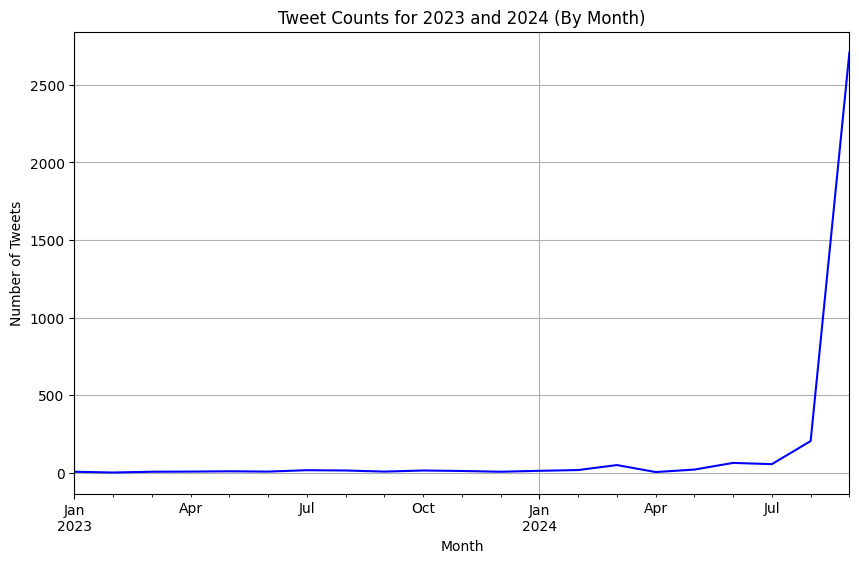

In [28]:
# Extract month and day number from the 'Day' column
df['Month'] = df['Day'].dt.month
df['Day_Number'] = df['Day'].dt.day

# Filter data for the years 2023 and 2024
df_2023_2024 = df[(df['Day'].dt.year == 2023) | (df['Day'].dt.year == 2024)]

# Group by month and count the number of tweets for 2023 and 2024
tweet_counts_by_month = df_2023_2024.groupby(df_2023_2024['Day'].dt.to_period('M')).size()

# Plot tweet counts over time for 2023 and 2024
plt.figure(figsize=(10, 6))
tweet_counts_by_month.plot(kind='line', color='blue')
plt.title('Tweet Counts for 2023 and 2024 (By Month)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [29]:
# Filter for tweets from 2024
df_2024 = df[df['Day'].dt.year == 2024]

# Group by month and count the number of tweets in 2024
tweet_counts_2024 = df_2024.groupby(df_2024['Day'].dt.month).size().reset_index(name='Tweet_Count')

# Rename the month column for clarity
tweet_counts_2024.columns = ['Month', 'Tweet_Count']

# Display the tweet counts for 2024
print(tweet_counts_2024)


   Month  Tweet_Count
0      1           12
1      2           17
2      3           49
3      4            4
4      5           20
5      6           63
6      7           55
7      8          204
8      9         2708


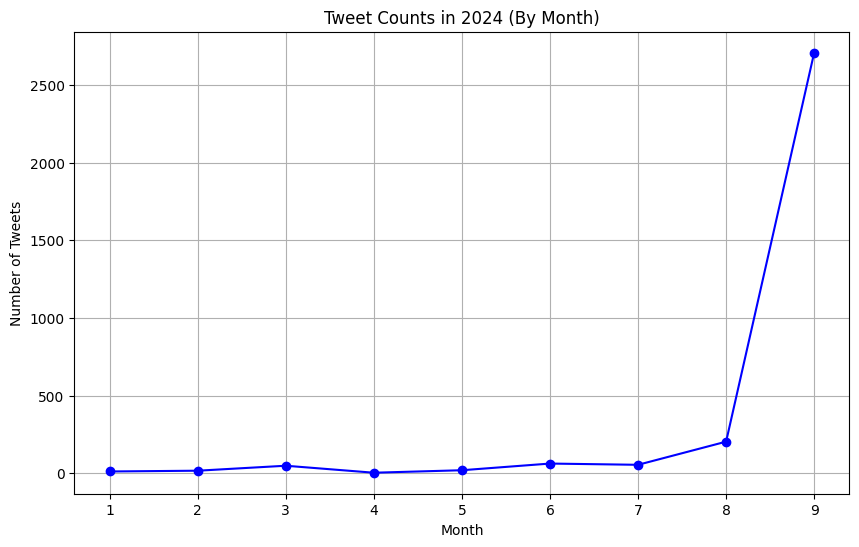

In [30]:
import matplotlib.pyplot as plt

# Filter for tweets from 2024
df_2024 = df[df['Day'].dt.year == 2024]

# Group by month and count the number of tweets in 2024
tweet_counts_2024 = df_2024.groupby(df_2024['Day'].dt.month).size()

# Plot tweet counts for 2024 (line chart)
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_2024.index, tweet_counts_2024.values, color='blue', marker='o')
plt.title('Tweet Counts in 2024 (By Month)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


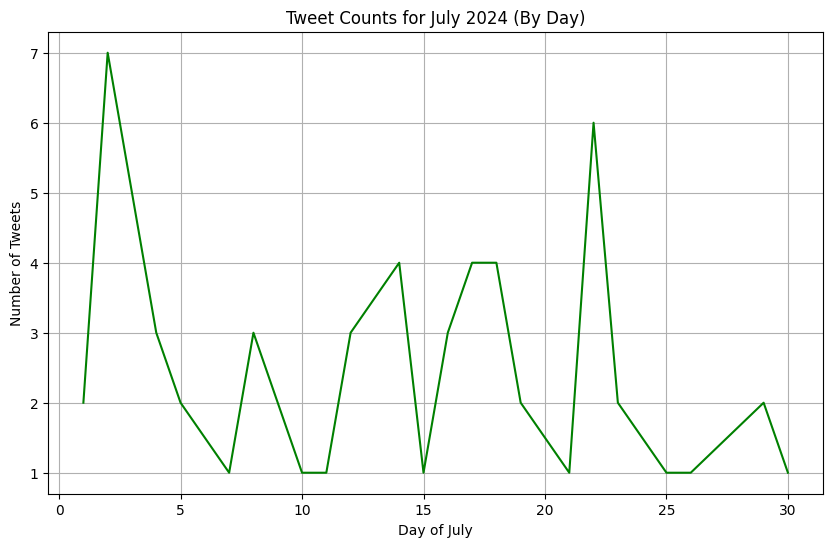

In [31]:
# Filter the data for July 2024
df_july_2024 = df[(df['Day'].dt.year == 2024) & (df['Day'].dt.month == 7)]

# Group by day and count the number of tweets for each day in July 2024
tweet_counts_july_2024 = df_july_2024.groupby(df_july_2024['Day'].dt.day).size()

# Plot tweet counts over time for July 2024 (by day)
plt.figure(figsize=(10, 6))
tweet_counts_july_2024.plot(kind='line', color='green')
plt.title('Tweet Counts for July 2024 (By Day)')
plt.xlabel('Day of July')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


# Sentiment over time


In [32]:
from textblob import TextBlob

In [34]:
df['sentiment'] = df['text_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['text_lemmatized', 'sentiment']][:40])

                                      text_lemmatized  sentiment
0   thanks fan around world reached maximum donati...   0.500000
1   say wow thanks activism reached donation goal ...   0.150000
2   let end extreme poverty dec join call world le...  -0.039583
3   people know africa wealthiest man know one fou...   0.333333
4   malnutrition greatest health inequity world re...   0.500000
5   malnutrition single greatest health inequity w...   0.255714
6   labour create apprenticeship renewable energy ...  -0.200000
7   baby month dont give water dont need dont want...  -0.150000
8   angelina adopted zahara ethiopia infant six mo...   0.100000
9   im shocked according freedom information respo...   0.016667
10  selfproclaimed messiah khulu reinfirst manyuka...   0.200000
11  proper nutrition vital build prosperous nation...   0.050000
12  world food programme awarded world largest hum...   0.000000
13  wfp fao warn increase rate malnutrition sri la...   0.200000
14              kaduna lo

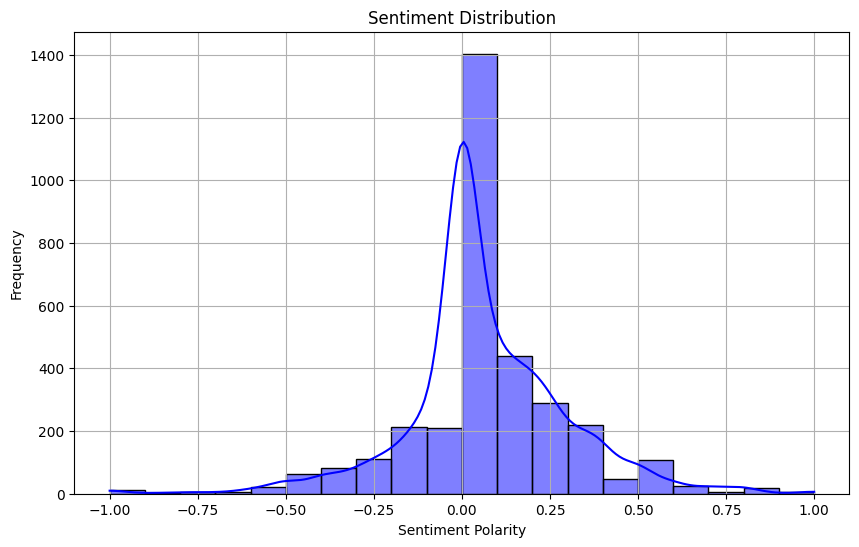

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the sentiment distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


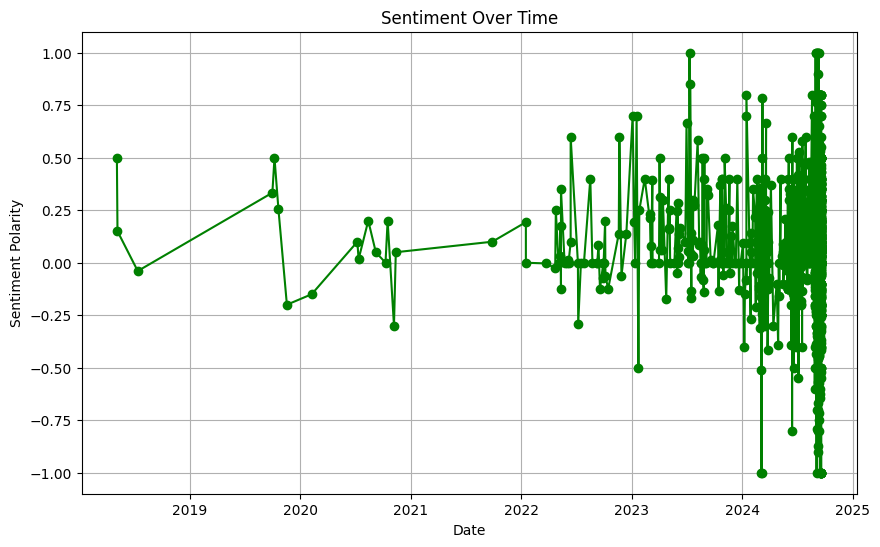

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(df['Day'], df['sentiment'], color='green', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()


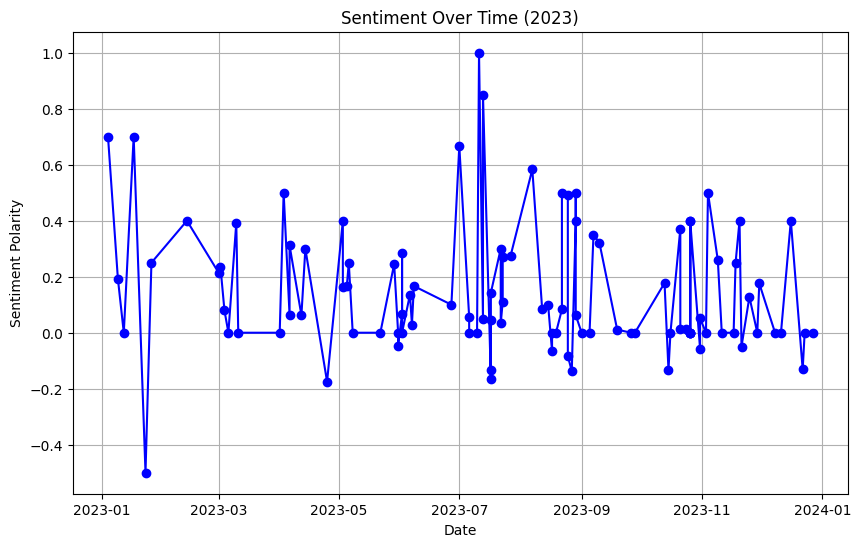

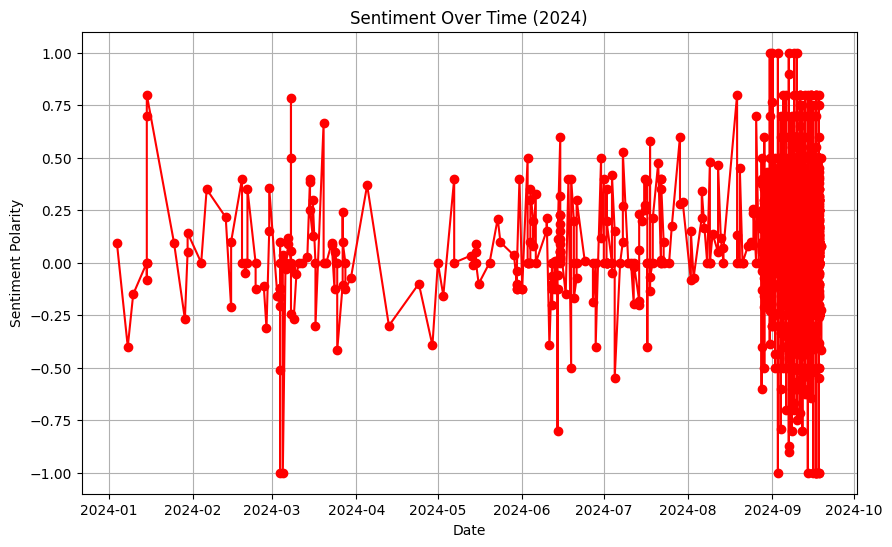

In [37]:
# Filter data for 2023
df_2023 = df[df['Day'].dt.year == 2023]

# Filter data for 2024
df_2024 = df[df['Day'].dt.year == 2024]

# Plot sentiment for 2023
plt.figure(figsize=(10, 6))
plt.plot(df_2023['Day'], df_2023['sentiment'], color='blue', marker='o')
plt.title('Sentiment Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()

# Plot sentiment for 2024
plt.figure(figsize=(10, 6))
plt.plot(df_2024['Day'], df_2024['sentiment'], color='red', marker='o')
plt.title('Sentiment Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.grid(True)
plt.show()


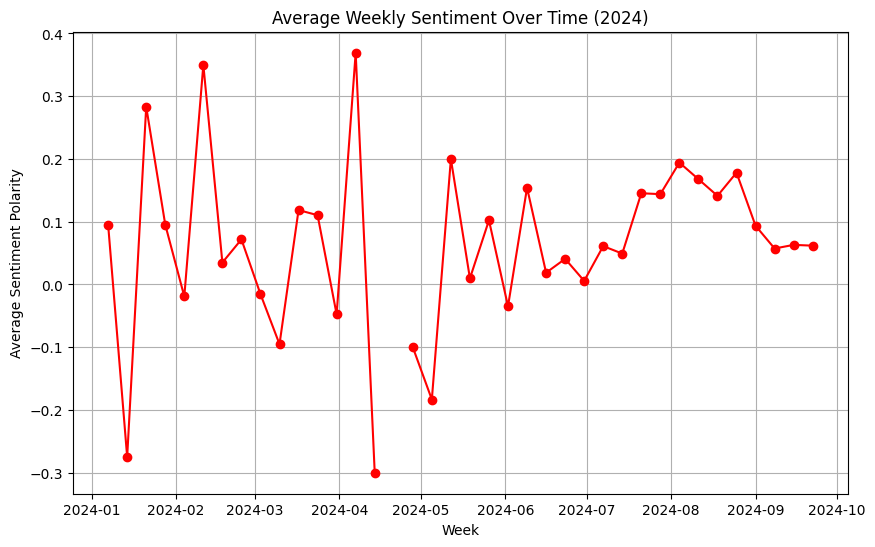

In [38]:
# Aggregate sentiment by week and calculate the average sentiment for each week
df_2024_weekly = df_2024.resample('W', on='Day')['sentiment'].mean()

# Plot sentiment for 2024 (aggregated by week)
plt.figure(figsize=(10, 6))
plt.plot(df_2024_weekly.index, df_2024_weekly, color='red', marker='o')
plt.title('Average Weekly Sentiment Over Time (2024)')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Polarity')
plt.grid(True)
plt.show()


# Topic Modelling

In [40]:
!pip install pyLDAvis

import os
import tempfile
import logging
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

# Temporary folder for saving dictionary and corpus
TEMP_FOLDER = tempfile.gettempdir()
print(f'Folder "{TEMP_FOLDER}" will be used to save temporary dictionary and corpus.')

# Setup logging to track the LDA process
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.6 MB/s eta 0:00:00
Folder "/tmp" will be used to save temporary dictionary and corpus.


In [41]:
# Convert the 'text_lemmatized' column into a text corpus
corpus = list(df['text_lemmatized'])

# Tokenize each document (splitting the text into words)
texts = [[word for word in str(document).split()] for document in corpus]

# Display a few tokenized examples
texts[:5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['thanks',
  'fan',
  'around',
  'world',
  'reached',
  'maximum',
  'donation',
  'goal',
  'fund',
  'unlocked',
  'campaign',
  'help',
  'provide',
  'food',
  'packet',
  'child',
  'suffering',
  'malnutrition',
  'happy',
  'learn'],
 ['say',
  'wow',
  'thanks',
  'activism',
  'reached',
  'donation',
  'goal',
  'day',
  'fund',
  'help',
  'provide',
  'lifesaving',
  'support',
  'child',
  'suffering',
  'malnutrition'],
 ['let',
  'end',
  'extreme',
  'poverty',
  'dec',
  'join',
  'call',
  'world',
  'leader',
  'fight',
  'malnutrition',
  'end',
  'unnecessary',
  'disease',
  'educate',
  'child',
  'repeal',
  'law',
  'hold',
  'woman',
  'back',
  'ensure',
  'clean',
  'water',
  'go',
  'detail'],
 ['people',
  'know',
  'africa',
  'wealthiest',
  'man',
  'know',
  'one',
  'foundation',
  'impactful',
  'partner',
  'improving',
  'health',
  'melinda',
  'lucky',
  'count',
  'partner',
  'friend',
  'work'],
 ['malnutrition',
  'greatest',
  'health',


In [42]:
# Create a dictionary based on the tokenized words
dictionary = corpora.Dictionary(texts)

# Save the dictionary as a local file for LDA model to access
dictionary.save(os.path.join(TEMP_FOLDER, 'lda_model.dict'))

# Print out the dictionary to see word-to-ID mapping
print(dictionary.token2id)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'around': 0, 'campaign': 1, 'child': 2, 'donation': 3, 'fan': 4, 'food': 5, 'fund': 6, 'goal': 7, 'happy': 8, 'help': 9, 'learn': 10, 'malnutrition': 11, 'maximum': 12, 'packet': 13, 'provide': 14, 'reached': 15, 'suffering': 16, 'thanks': 17, 'unlocked': 18, 'world': 19, 'activism': 20, 'day': 21, 'lifesaving': 22, 'say': 23, 'support': 24, 'wow': 25, 'back': 26, 'call': 27, 'clean': 28, 'dec': 29, 'detail': 30, 'disease': 31, 'educate': 32, 'end': 33, 'ensure': 34, 'extreme': 35, 'fight': 36, 'go': 37, 'hold': 38, 'join': 39, 'law': 40, 'leader': 41, 'let': 42, 'poverty': 43, 'repeal': 44, 'unnecessary': 45, 'water': 46, 'woman': 47, 'africa': 48, 'count': 49, 'foundation': 50, 'friend': 51, 'health': 52, 'impactful': 53, 'improving': 54, 'know': 55, 'lucky': 56, 'man': 57, 'melinda': 58, 'one': 59, 'partner': 60, 'people': 61, 'wealthiest': 62, 'work': 63, 'get': 64, 'greatest': 65, 'inequity': 66, 'iodized': 67, 'kid': 68, 'need': 69, 'nutrient': 70, 'recently': 71, 'salt': 72, 's

In [43]:
# Convert the text into the bag-of-words format (word frequencies)
corpus_bow = [dictionary.doc2bow(text) for text in texts]

# Display an example of the bag-of-words format for one document
print(corpus_bow[0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


In [44]:
# Construct TF-IDF features from the bag-of-words model
tfidf = models.TfidfModel(corpus_bow)

# Transform the corpus into TF-IDF feature vectors
corpus_tfidf = tfidf[corpus_bow]

# Display an example of the TF-IDF representation for one document
print(list(corpus_tfidf)[0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.19039772914468395), (1, 0.20054577866533022), (2, 0.09232955702864583), (3, 0.22984963653079568), (4, 0.33678471222884837), (5, 0.023647753106012876), (6, 0.1962112934481704), (7, 0.21362888996408327), (8, 0.2592567354696063), (9, 0.12600802157243315), (10, 0.1549558470205087), (11, 0.05479998185766084), (12, 0.36830743323956633), (13, 0.3183451025168834), (14, 0.17777168373620547), (15, 0.2592567354696063), (16, 0.16520832293210694), (17, 0.1962112934481704), (18, 0.36830743323956633), (19, 0.12920877645257564)]


In [45]:
# Set the number of topics (e.g., 10 topics)
total_topics = 40

# Apply the LDA model to the TF-IDF corpus
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics)

# Display the topics with the top 6 words in each topic
lda.show_topics(total_topics, num_words=6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"fertilizer" + 0.005*"lack" + 0.004*"nigeria" + 0.004*"video" + 0.004*"child" + 0.004*"driving"'),
 (1,
  '0.005*"innovator" + 0.005*"workshop" + 0.005*"reducing" + 0.004*"agroforestry" + 0.004*"act" + 0.004*"sustainable"'),
 (2,
  '0.007*"programme" + 0.006*"animal" + 0.005*"fao" + 0.005*"getting" + 0.005*"canadian" + 0.005*"online"'),
 (3,
  '0.008*"discus" + 0.007*"uk" + 0.006*"launch" + 0.005*"promote" + 0.005*"talking" + 0.005*"register"'),
 (4,
  '0.015*"weight" + 0.007*"developing" + 0.006*"pregnancy" + 0.006*"praise" + 0.005*"becoming" + 0.005*"university"'),
 (5,
  '0.007*"smallscale" + 0.006*"father" + 0.006*"death" + 0.005*"organic" + 0.005*"daughter" + 0.005*"matter"'),
 (6,
  '0.012*"atrophy" + 0.011*"treat" + 0.008*"help" + 0.008*"want" + 0.007*"maize" + 0.006*"like"'),
 (7,
  '0.010*"moving" + 0.009*"lot" + 0.008*"sudan" + 0.007*"budget" + 0.006*"no" + 0.006*"pollution"'),
 (8,
  '0.006*"garden" + 0.006*"show" + 0.006*"public" + 0.005*"trade" + 0.005*"micro

In [46]:
# Visualization using pyLDAvis
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_bow, dictionary, mds='tsne')

# Display the visualization
panel


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21     3.595420  1.353796       1        1  8.333945
9      3.098121  0.863827       2        1  5.187112
38     2.951954  0.828232       3        1  4.909929
23     3.415667  2.154817       4        1  4.264930
12     3.206540  1.592881       5        1  4.224318
16     2.861046  2.653974       6        1  3.580200
18     1.189036  2.402658       7        1  3.561565
28     1.444873  2.332214       8        1  3.279688
8      1.935785  2.924800       9        1  3.199811
6      1.773126  0.712598      10        1  3.148085
3      2.695182  1.376611      11        1  2.898546
37     2.237889  2.749324      12        1  2.893520
20     3.030801  1.853992      13        1  2.829952
39     1.651428  1.170558      14        1  2.829699
0      1.733507  1.967928      15        1  2.661659
29     2.178780  1.560319      16        1  2.648180
19     1.432347  1.673458      17        1  2.583969
1      2.870625  1.623068      18        1  2.477129
14     1.034016  1.800950      19        1  2.390526
15     2.043639  1.206316      20        1  2.320788
17     2.435099  2.468153      21        1  2.272866
24     1.029896  1.670758      22        1  2.174346
22     2.360552  1.267084      23        1  1.968348
32     2.635629  2.323928      24        1  1.938191
11     1.687471  2.160200      25        1  1.654724
2      2.399161  1.390813      26        1  1.628403
33     2.534389  1.789158      27        1  1.608384
27     2.209862  1.879018      28        1  1.608173
26     2.477453  1.901123      29        1  1.596111
31     2.420119  1.638619      30        1  1.501801
10     1.864072  2.094464      31        1  1.469939
5      1.857507  1.896468      32        1  1.366668
4      2.098096  2.016139      33        1  1.334733
25     2.017389  1.798656      34        1  1.316000
13     2.125833  1.832184      35        1  1.229721
36     2.075016  1.913686      36        1  1.165230
34     2.223633  1.843337      37        1  1.146442
35     1.999867  1.842638      38        1  1.033664
7      2.194002  1.828839      39        1  0.910203
30     2.104281  1.794378      40        1  0.852502, topic_info=              Term       Freq       Total Category  logprob  loglift
3035          gate  65.000000   65.000000  Default  30.0000  30.0000
2099       suffers  55.000000   55.000000  Default  29.0000  29.0000
527           bill  54.000000   54.000000  Default  28.0000  28.0000
105           baby  47.000000   47.000000  Default  27.0000  27.0000
3382          soil  58.000000   58.000000  Default  26.0000  26.0000
...            ...        ...         ...      ...      ...      ...
1060      bringing   1.628493   13.681366  Topic40  -5.9727   2.6364
136          first   1.825526   42.810701  Topic40  -5.8585   1.6098
406            eat   1.445378   20.672650  Topic40  -6.0920   2.1043
87     agriculture   1.691304  233.099301  Topic40  -5.9348  -0.1612
11    malnutrition   1.575684  220.916528  Topic40  -6.0057  -0.1783

[2111 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5101     38  0.416258     abattoir
7116      6  0.454904  abdulrahman
1245      4  0.523977         able
1245     10  0.157193         able
1245     17  0.052398         able
...     ...       ...          ...
2682     12  0.080331         zero
2682     14  0.080331         zero
2682     23  0.401656         zero
2682     32  0.080331         zero
5866     14  0.646046      zionist

[7770 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 10, 39, 24, 13, 17, 19, 29, 9, 7, 4, 38, 21, 40, 1, 30, 20, 2, 15, 16, 18, 25, 23, 33, 12, 3, 34, 28, 27, 32, 11, 6, 5, 26, 14, 37, 35, 36, 8, 31])

# Hugging Face

In [47]:
from transformers import AutoTokenizer, AutoModelWithLMHead
import pandas as pd

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

# Function to get emotion from text using the model
def get_emotion(text):
    input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')
    output = model.generate(input_ids=input_ids, max_length=2)
    dec = [tokenizer.decode(ids) for ids in output]
    label = dec[0]
    return label.strip()  # Strip unwanted characters like spaces

# Apply emotion detection to the 'text_lemmatized' column of the entire dataset
df['emotion'] = df['text_lemmatized'].apply(get_emotion)

# View the first few rows to verify the results
df[['text_lemmatized', 'emotion']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1748: FutureWarning: The class `AutoModelWithLMHead` is deprecated

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1630 > 512). Running this sequence through the model will result in indexing errors


,text_lemmatized,emotion
0,thanks fan around world reached maximum donati...,<pad> sadness
1,say wow thanks activism reached donation goal ...,<pad> sadness
2,let end extreme poverty dec join call world le...,<pad> sadness
3,people know africa wealthiest man know one fou...,<pad> joy
4,malnutrition greatest health inequity world re...,<pad> sadness


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-c6f35586f83e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


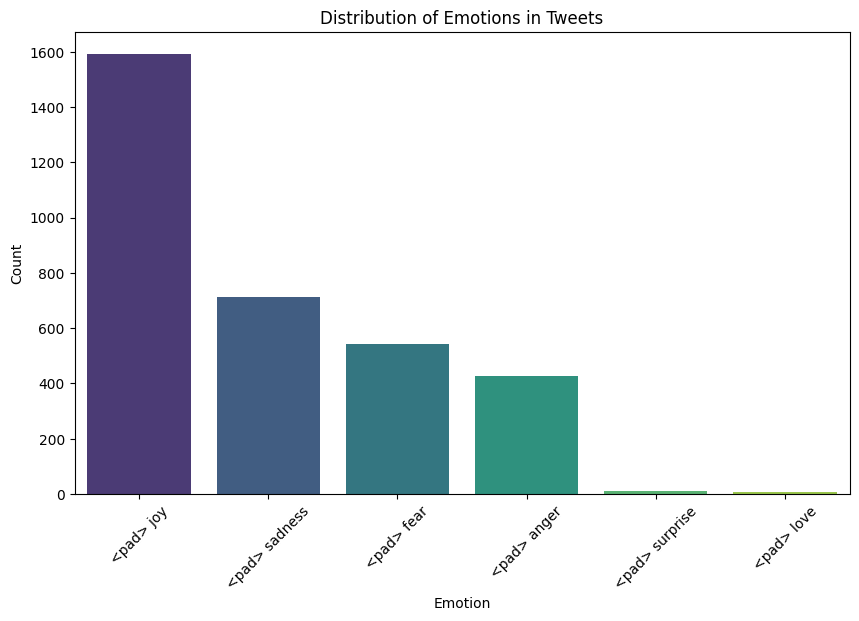

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count of the emotions
emotion_counts = df['emotion'].value_counts()

# Plot the distribution of emotions
plt.figure(figsize=(10,6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title('Distribution of Emotions in Tweets')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
